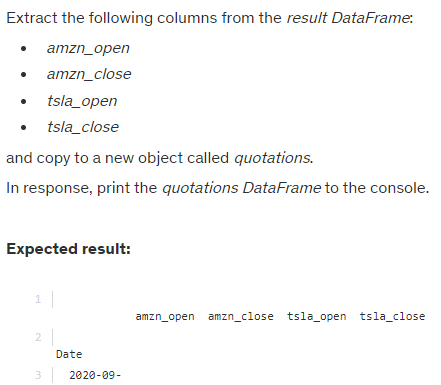

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

amazon = pd.read_csv('amazon.csv', index_col=0)
tesla = pd.read_csv('tesla.csv', index_col=0)
amazon.columns = ['amzn_' + col.lower() for col in amazon.columns]
tesla.columns = ['tsla_' + col.lower() for col in tesla.columns]
result = pd.concat([amazon, tesla], axis=1)

In [4]:
quotations = result[['amzn_open','amzn_close','tsla_open','tsla_close']]
print(quotations)

            amzn_open  amzn_close  tsla_open  tsla_close
Date                                                    
2020-09-22  3033.8350     3128.99     429.60      424.23
2020-09-21  2906.5000     2960.47     453.13      449.39
2020-09-18  3031.7400     2954.91     447.94      442.15
2020-09-17  3009.2500     3008.73     415.60      423.43
2020-09-16  3179.9900     3078.10     439.87      441.76
2020-09-15  3136.1600     3156.13     436.56      449.76
2020-09-14  3172.9372     3102.97     380.95      419.62
2020-09-11  3208.6900     3116.22     381.94      372.72
2020-09-10  3307.2188     3175.11     386.21      371.34
2020-09-09  3202.9900     3268.61     356.60      366.28
2020-09-08  3144.0000     3149.84     356.00      330.21
2020-09-04  3318.0000     3294.62     402.81      418.32
2020-09-03  3485.0000     3368.00     407.23      407.00
2020-09-02  3547.0000     3531.45     478.99      447.37
2020-09-01  3489.5800     3499.12     502.14      475.05
2020-08-31  3408.9900     3450.

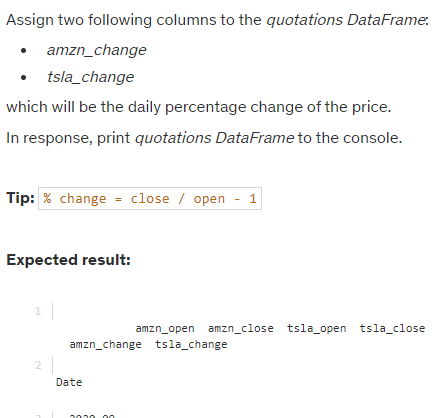

In [6]:
quotations['amzn_change'] = (quotations['amzn_close']/quotations['amzn_open'] - 1)*100
quotations['tsla_change'] = (quotations['tsla_close']/quotations['tsla_open'] - 1)*100
print(quotations)

            amzn_open  amzn_close  tsla_open  tsla_close  amzn_change  tsla_change
Date                                                                              
2020-09-22  3033.8350     3128.99     429.60      424.23     3.136459    -1.250000
2020-09-21  2906.5000     2960.47     453.13      449.39     1.856873    -0.825370
2020-09-18  3031.7400     2954.91     447.94      442.15    -2.534188    -1.292584
2020-09-17  3009.2500     3008.73     415.60      423.43    -0.017280     1.884023
2020-09-16  3179.9900     3078.10     439.87      441.76    -3.204098     0.429672
2020-09-15  3136.1600     3156.13     436.56      449.76     0.636766     3.023639
2020-09-14  3172.9372     3102.97     380.95      419.62    -2.205124    10.150938
2020-09-11  3208.6900     3116.22     381.94      372.72    -2.881861    -2.413992
2020-09-10  3307.2188     3175.11     386.21      371.34    -3.994559    -3.850237
2020-09-09  3202.9900     3268.61     356.60      366.28     2.048711     2.714526
2020

C:\Users\kumar\AppData\Local\Temp\ipykernel_1624\4058805623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotations['amzn_change'] = (quotations['amzn_close']/quotations['amzn_open'] - 1)*100
C:\Users\kumar\AppData\Local\Temp\ipykernel_1624\4058805623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotations['tsla_change'] = (quotations['tsla_close']/quotations['tsla_open'] - 1)*100


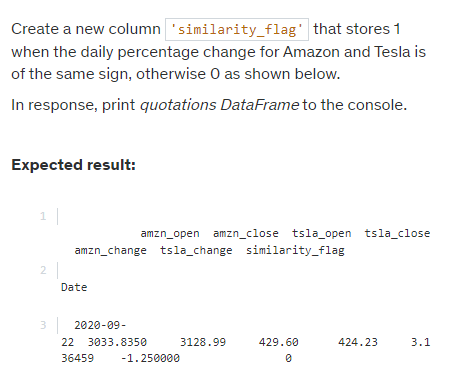

In [9]:
quotations['similarity_flag'] = ((quotations['amzn_change'] * quotations['tsla_change'] > 0).astype(int))
# quotations['similarity_flag'] = (np.sign(quotations['amzn_change']) == np.sign(quotations['tsla_change'])).astype(int)
print(quotations)

            amzn_open  amzn_close  tsla_open  tsla_close  amzn_change  tsla_change  similarity_flag
Date                                                                                               
2020-09-22  3033.8350     3128.99     429.60      424.23     3.136459    -1.250000                0
2020-09-21  2906.5000     2960.47     453.13      449.39     1.856873    -0.825370                0
2020-09-18  3031.7400     2954.91     447.94      442.15    -2.534188    -1.292584                1
2020-09-17  3009.2500     3008.73     415.60      423.43    -0.017280     1.884023                0
2020-09-16  3179.9900     3078.10     439.87      441.76    -3.204098     0.429672                0
2020-09-15  3136.1600     3156.13     436.56      449.76     0.636766     3.023639                1
2020-09-14  3172.9372     3102.97     380.95      419.62    -2.205124    10.150938                0
2020-09-11  3208.6900     3116.22     381.94      372.72    -2.881861    -2.413992                1


C:\Users\kumar\AppData\Local\Temp\ipykernel_1624\3969572206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotations['similarity_flag'] = ((quotations['amzn_change'] * quotations['tsla_change'] > 0).astype(int))
